

#Analyzing Unemployment in India





---



#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Remove Warnings
import warnings
warnings.filterwarnings("ignore")
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load dataset
df = pd.read_csv('/content/Unemployment in India.csv')
df_2 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
# Max column printing option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Rename the Attributes
* Region = region
* Date = date
* Frequency = frequency
* Estimated Unemployment Rate (%) = estimated unemployment rate
* Estimated Employed = estimated employment
* Estimated Labour Participation Rate (%) = estimated labour participation rate
* Area = area

In [6]:
#Rename the columns
df.columns =['region','date','frequency','estimated unemployment rate',
             'estimated employed','estimatesd labour participation rate','area']

In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region                                740 non-null    object 
 1   date                                  740 non-null    object 
 2   frequency                             740 non-null    object 
 3   estimated unemployment rate           740 non-null    float64
 4   estimated employed                    740 non-null    float64
 5   estimatesd labour participation rate  740 non-null    float64
 6   area                                  740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
# Check rows and columns

print("Number of Rows in dataset: ", df.shape[0])
print("Number of Columns in dataset: ", df.shape[1])

Number of Rows in dataset:  768
Number of Columns in dataset:  7


In [9]:
# Function to print a summary of the DataFrame's column types
def print_data_summary(df):
    # Count the number of categorical columns
    object_count = df.select_dtypes(include=['object']).shape[1]
    # Count the number of float columns
    float_count = df.select_dtypes(include=['float64']).shape[1]
    # Count the number of integer columns
    int_count = df.select_dtypes(include=['int64']).shape[1]

    # Print the counts in a bullet-point format
    print(f"• object columns: {object_count}")
    print(f"• Float columns: {float_count}")
    print(f"• Integer columns: {int_count}")

# Print a heading for the data summary section (assuming 'heading' is a defined function)

print_data_summary(df)

• object columns: 4
• Float columns: 3
• Integer columns: 0


In [10]:
# Describe the dataset
df.describe()

,estimated unemployment rate,estimated employed,estimatesd labour participation rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


Inferences:

The provided statistics summarize three sets of data:

1. Count: This is the number of observations or data points in each set, which is 740 for each.

2. Mean: The mean, or average, is the sum of all the values in the data set divided by the number of observations (740). For each data set, the mean is as follows:

  *Unemployment rate: 11.79%
  *Employed: Approximately 7,204,460 people
  *Labor participation rate: 42.63%
3. Standard Deviation (Std): The standard deviation measures how spread out the values are from the mean. A higher standard deviation indicates more variability in the data.

  *Unemployment rate: 10.72%
  *Employed: 8,087,988 people           
  *Labor participation rate: 8.11%
4. Minimum (Min): The smallest value in each data set.

  *Unemployment rate: 0%
  *Employed: 49,420 people
  *Labor participation rate: 13.33%
5. 25th Percentile: The value below which 25% of the data points fall.

  *Unemployment rate: 4.66%
  *Employed: 1,190,404 people
  *Labor participation rate: 38.06%
6. 50th Percentile (Median): The value that divides the data set in half, with 50% of the data points above and 50% below.

  *Unemployment rate: 8.35%
  *Employed: 4,744,178 people
  *Labor participation rate: 41.16%
7. 75th Percentile: The value below which 75% of the data points fall.

  *Unemployment rate: 15.89%
  *Employed: 11,275,490 people
  *Labor participation rate: 45.51%
8. Maximum (Max): The largest value in each data set.

  *Unemployment rate: 76.74%
  *Employed: 45,777,510 people
  *Labor participation rate: 72.57%

#Dealing with missing value

In [11]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

,0
region,28
date,28
frequency,28
estimated unemployment rate,28
estimated employed,28
estimatesd labour participation rate,28
area,28


In [12]:
df.isnull().sum() / len(df) * 100

,0
region,3.645833
date,3.645833
frequency,3.645833
estimated unemployment rate,3.645833
estimated employed,3.645833
estimatesd labour participation rate,3.645833
area,3.645833


In [13]:
# Drop Missing values
df = df.dropna()

In [14]:
df.isnull().sum()

,0
region,0
date,0
frequency,0
estimated unemployment rate,0
estimated employed,0
estimatesd labour participation rate,0
area,0


<Axes: >

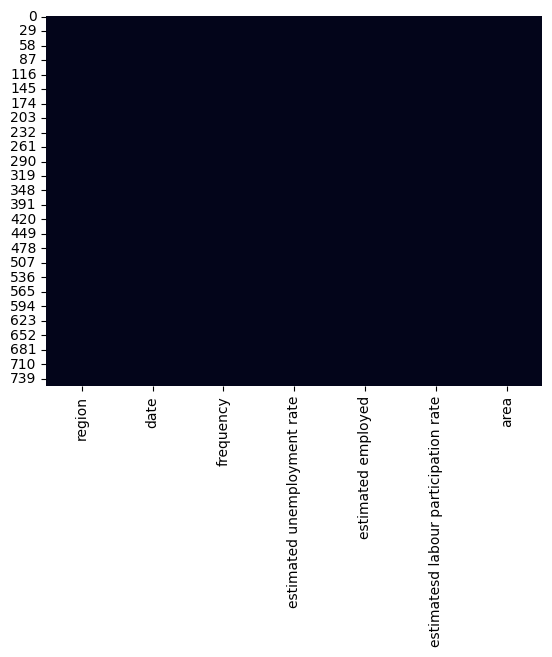

In [15]:
sns.heatmap(df.isnull(),cbar=False)

#Identify Duplicates

In [16]:
# Check dupliates values
df.duplicated().sum()

0

#Check Correlation

In [17]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

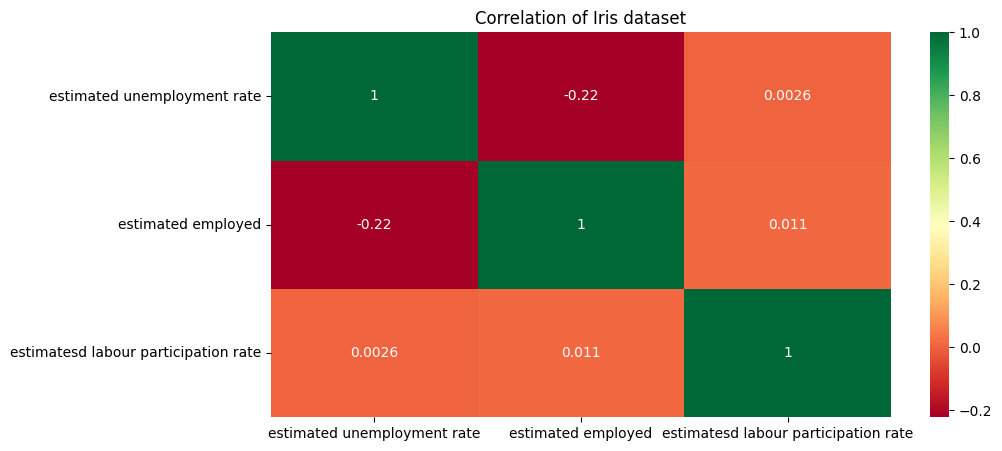

In [18]:
# Plot the correlation

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True , cmap='RdYlGn')
plt.title("Correlation of Iris dataset")
plt.show()

#Value counts

In [19]:
df.head()

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Axes(0.125,0.11;0.775x0.77)


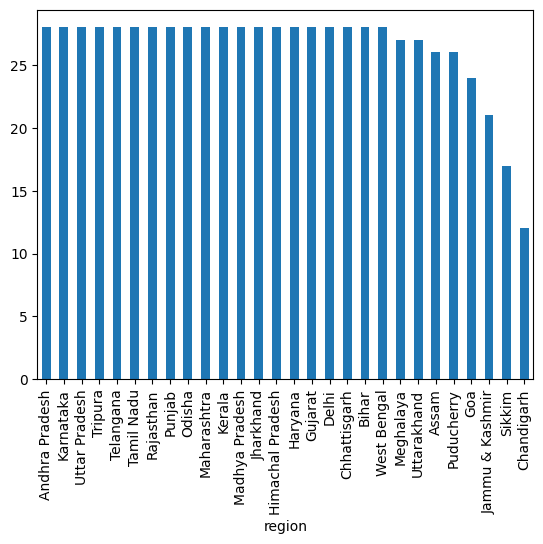

In [20]:
print(df.value_counts('region').plot.bar())

Axes(0.125,0.11;0.775x0.77)


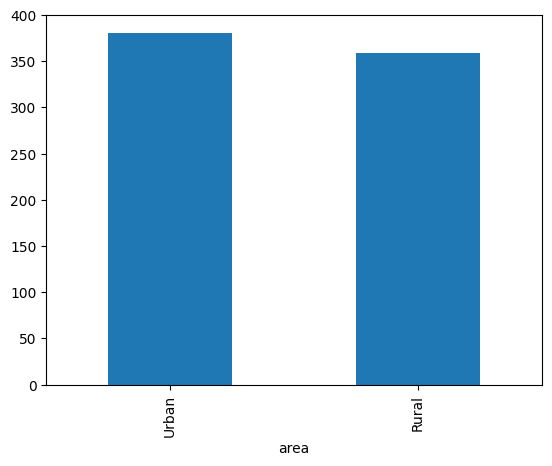

In [21]:
# value count of area
print(df.value_counts('area').plot.bar())

The area is divide into category

*Urban                                                                                  
*Rural

In [22]:
print(df.value_counts('frequency'))

frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64


In [23]:
df['frequency'] = df['frequency'].replace(' Monthly','Monthly')

In [24]:
df.value_counts('frequency' )

,count
frequency,
Monthly,740


Extract data
I can extract data in which the date columns include date_year, date_month_no, month_name, and date_day

In [25]:
df['date'] = pd.to_datetime(df['date'])
df['date_year'] = df['date'].dt.year

df.sample(5)

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year
630,Punjab,2019-05-31,Monthly,13.49,3289918.0,40.03,Urban,2019
662,Sikkim,2019-09-30,Monthly,4.81,89450.0,45.61,Urban,2019
284,Tamil Nadu,2020-01-31,Monthly,1.18,14954646.0,46.23,Rural,2020
380,Andhra Pradesh,2019-12-31,Monthly,7.88,4913963.0,38.61,Urban,2019
175,Madhya Pradesh,2019-05-31,Monthly,3.63,15349838.0,37.97,Rural,2019


In [26]:
df['date_month_no'] = df['date'].dt.month

df.sample(5)

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year,date_month_no
531,Jharkhand,2020-05-31,Monthly,70.17,830347.0,40.49,Urban,2020,5
148,Karnataka,2019-06-30,Monthly,5.98,12888490.0,43.12,Rural,2019,6
701,Tripura,2019-08-31,Monthly,33.45,368977.0,59.07,Urban,2019,8
380,Andhra Pradesh,2019-12-31,Monthly,7.88,4913963.0,38.61,Urban,2019,12
313,Tripura,2020-02-29,Monthly,26.22,1169347.0,69.88,Rural,2020,2


In [27]:
df['Month_name'] = df['date'].dt.month_name()

df.sample(5)

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year,date_month_no,Month_name
709,Tripura,2020-04-30,Monthly,34.88,296431.0,47.65,Urban,2020,4,April
20,Assam,2019-11-30,Monthly,4.66,9625362.0,46.64,Rural,2019,11,November
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5,May
487,Haryana,2019-11-30,Monthly,27.06,2404239.0,39.18,Urban,2019,11,November
150,Karnataka,2019-08-31,Monthly,0.37,12686470.0,39.93,Rural,2019,8,August


In [28]:
df['date_day'] = df['date'].dt.day

df.sample(5)

,region,date,frequency,estimated unemployment rate,estimated employed,estimatesd labour participation rate,area,date_year,date_month_no,Month_name,date_day
385,Andhra Pradesh,2020-05-31,Monthly,24.91,3428356.0,32.69,Urban,2020,5,May,31
250,Punjab,2019-12-31,Monthly,6.13,6164215.0,43.40,Rural,2019,12,December,31
208,Meghalaya,2019-10-31,Monthly,3.70,1080609.0,63.44,Rural,2019,10,October,31
580,Maharashtra,2019-10-31,Monthly,7.51,17221991.0,39.05,Urban,2019,10,October,31
49,Chhattisgarh,2020-02-29,Monthly,7.89,6847173.0,45.05,Rural,2020,2,February,29


#[ EDA ] Exploratary data analysis

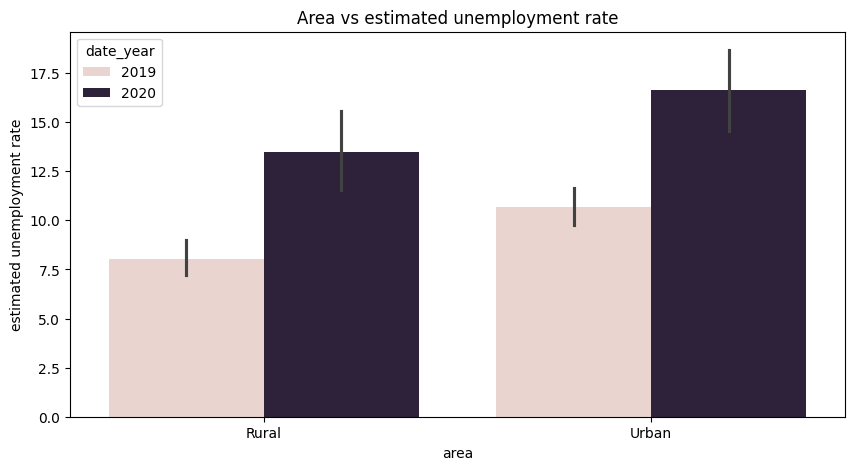

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='area', y='estimated unemployment rate', data=df, hue='date_year')
plt.title("Area vs estimated unemployment rate")
plt.show()

Rural areas

The unemployment rate increased

*2019 increase 3.65 to 7.6%                                            
*2020 increase 3.65 to 12.7%

Urban Areas

The unemployment rate increased

*2019 increase 3.65 to 10%                                                         
*2020 increase 3.65 to 15.1%

In [30]:
# check minimum and maximum unemployment rate
print("Minimum unemployment rate: ", df['estimated unemployment rate'].min())
print("Maximum unemployment rate: ", df['estimated unemployment rate'].max())

Minimum unemployment rate:  0.0
Maximum unemployment rate:  76.74


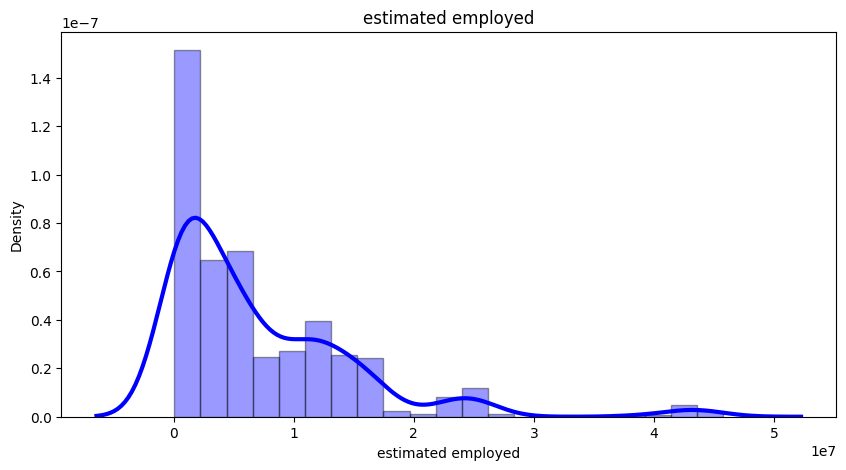

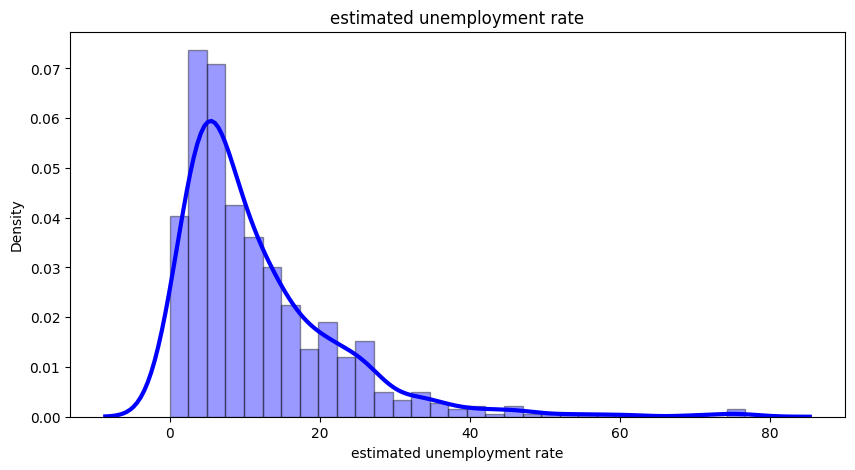

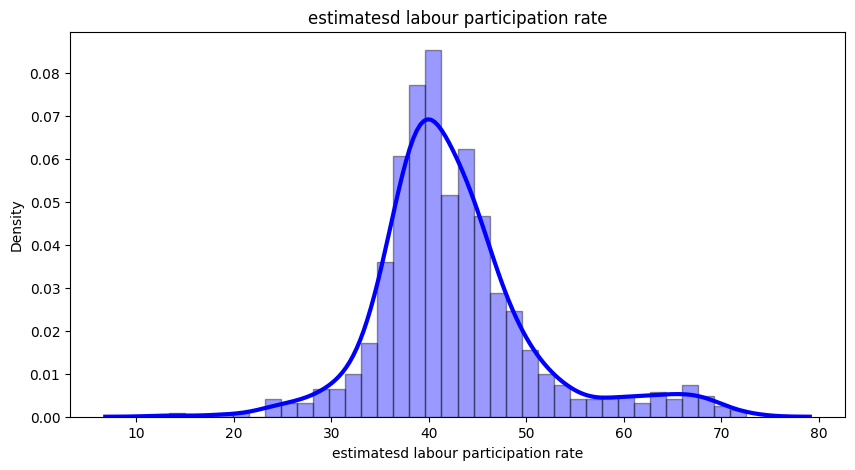

In [31]:
# Make distplot on estimated employed ,estimated unemployment rate,estimatesd labour participation rate using for loop
for col in ['estimated employed','estimated unemployment rate','estimatesd labour participation rate']:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col],color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 3})
    plt.title(col)
    plt.show()

In [32]:
#create  Sample data
data = {
    'region': ['Andhra Pradesh','Tripura','Karnataka','Meghalaya','Uttar Pradesh','Jammu & Kashmir '],
    'date': ['31-05-2019', '30-06-2019', '31-07-2019', '31-08-2019', '30-09-2019', '31-10-2019'],
    'estimated_unemployment_rate': [3.65, 3.05, 3.75, 3.32, 5.17, 3.83],
    'area': ['Rural', 'Urban', 'Rural', 'Urban', 'Rural','Urban']
}

# Create a DataFrame from the sample data
df_1 = pd.DataFrame(data)

# Convert the 'date' column to datetime format
df_1['date'] = pd.to_datetime(df_1['date'], format='%d-%m-%Y')

# Create a line plot using plotly
fig = px.bar(df_1,
        x='date',
        y='estimated_unemployment_rate',
        color='region',
        title='Estimated Unemployment Rate Over Time by Region',
        labels={
            'date': 'Date',
            'estimated_unemployment_rate': 'Estimated Unemployment Rate (%)',
            'region': 'Region',
            'area' : 'Area'
        },
        barmode='stack'
    )

# # show the plot
fig.show()

In This method i can select sample data. This will show how the unemployment rate changes over time for different regions

#Scatter plot

In [33]:
fig = px.scatter(df, x='estimatesd labour participation rate',
                 y='estimated unemployment rate',
                 color='region',
                 size='estimated employed',
                 hover_data=['area'],
                 title='Relationship between Estimated Labor Participation Rate and Estimated Unemployment Rate')
fig.show()

In [34]:
# Create a heatmap using Plotly Express
fig = px.density_heatmap(
    df,
    x='date',
    y='region',
    z='estimatesd labour participation rate',
    histfunc='avg',
    title='Estimated  labour participation Heatmap',
    labels={
        'date': 'Date',
        'region': 'Region',
        'estimatesd labour participation rate': 'Estimated labour participation Rate (%)'
    },
    color_continuous_scale='Viridis'  # Color intensity scale
)

# Add colorbar title
fig.update_layout(coloraxis_colorbar=dict(title='labour participation Rate(%)'))

# Show the interactive plot
fig.show()

In [35]:
fig = px.bar(df,x='region',y='estimated unemployment rate',animation_frame='Month_name',color='region',
            title='Unemployment rate from Jan 2020 to Oct 2020(State)',color_continuous_scale='RdBu_r'
            )

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [36]:
df_2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [37]:
#Rename the columns
df_2.columns =['state','date','frequency','estimated unemployment rate',
             'estimated employed','estimatesd labour participation rate','region','longitude','latitude']

In [38]:
# Create sunbrust chart using Plotly Express

fig = px.sunburst(df_2, path=['region', 'state'], values='estimated unemployment rate',
                  color='estimated employed', hover_data=['state'],height=600,)

# Show the plot
fig.show()